# Big-Data Analytics
## Project: Student Alcohol Consumption
#### Data Link : http://kaggle.com/uciml/student-alcohol-consumption

### Project Group 19



## data collection

In [1]:
# import libraries
import pandas as pd
import numpy as np

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22) address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- These grades are related with the course subject, Math or Portuguese:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets. These students can be identified by searching for identical attributes that characterize each student ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'].

In [2]:
# read student_mat.csv and show head
d_mat = pd.read_csv("student-mat.csv")
d_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# read student_por.csv and show head
d_por = pd.read_csv("student-por.csv")
d_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## data preprocessing/cleaning

In [4]:
# get info about datasets
d_mat.info()
d_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# rename grade columns for mat and por
d_mat.rename(columns = {'G1':'G1_mat', 'G2':'G2_mat', 'G3':'G3_mat'}, inplace = True)
d_por.rename(columns = {'G1':'G1_por', 'G2':'G2_por', 'G3':'G3_por'}, inplace = True)
d_mat.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_mat', 'G2_mat', 'G3_mat'],
      dtype='object')

In [6]:
# merge the datasets to data and export as "student.csv"
data = pd.merge(d_por, d_mat, how = 'left', on = ['school','sex','age','address','famsize',
                                                  'Pstatus','Medu','Fedu','Mjob','Fjob','reason',
                                                  'nursery','internet'], suffixes=('_p', '_m'))

data.to_csv("student.csv")
data.shape

(657, 53)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        657 non-null    object 
 1   sex           657 non-null    object 
 2   age           657 non-null    int64  
 3   address       657 non-null    object 
 4   famsize       657 non-null    object 
 5   Pstatus       657 non-null    object 
 6   Medu          657 non-null    int64  
 7   Fedu          657 non-null    int64  
 8   Mjob          657 non-null    object 
 9   Fjob          657 non-null    object 
 10  reason        657 non-null    object 
 11  guardian_p    657 non-null    object 
 12  traveltime_p  657 non-null    int64  
 13  studytime_p   657 non-null    int64  
 14  failures_p    657 non-null    int64  
 15  schoolsup_p   657 non-null    object 
 16  famsup_p      657 non-null    object 
 17  paid_p        657 non-null    object 
 18  activities_p  657 non-null    

## data exploration

This part will look at data relationship based on Portuguese language course and math course. Firstly, exploring the information common factors from both dataset. They are: school; address; family size; parent status; mother job; father job; reason; attending nursery school; internet; age; mother education level and father education level. 

Below, the graph tells this group of students has age range 15-20; more students comes from Gabriel Pereira than Mousinho da Silveira and they attending school for course reason; more students live in Urban than rural; the majority has parent together than separated; family size is greather than 3; more students' mother have higher level  education than fathers'education. 

Secondly, we check upon correlations of two courses students. 

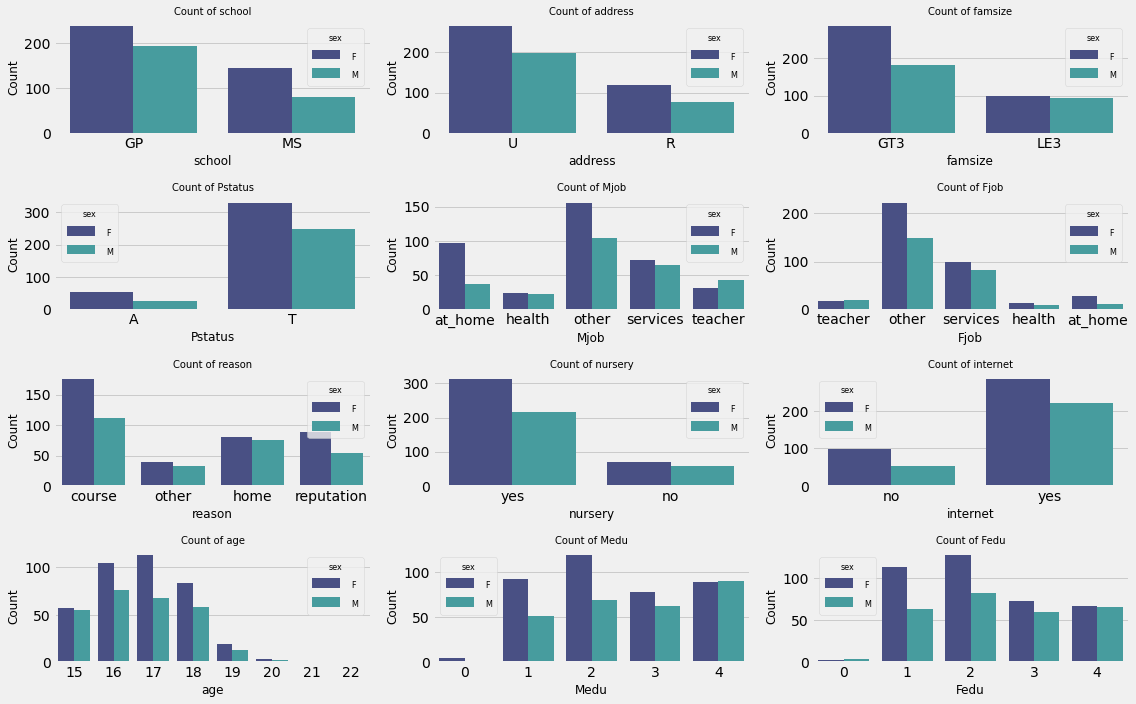

In [233]:
#counting plot of common factors for both dataset
fig=plt.figure()

cols=['school','address','famsize','Pstatus', 'Mjob','Fjob','reason','nursery','internet','age','Medu','Fedu']


for i,col in enumerate(cols):
    fig.add_subplot(4,3,i+1)
    fig.set_size_inches(16,)
    ax = sns.countplot(x=col,data=data,palette="mako",hue='sex')
    plt.title(f'Count of {col}',fontsize=10)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.setp(ax.get_legend().get_texts(), fontsize='8')  
    plt.setp(ax.get_legend().get_title(), fontsize='8') 
    plt.tight_layout()

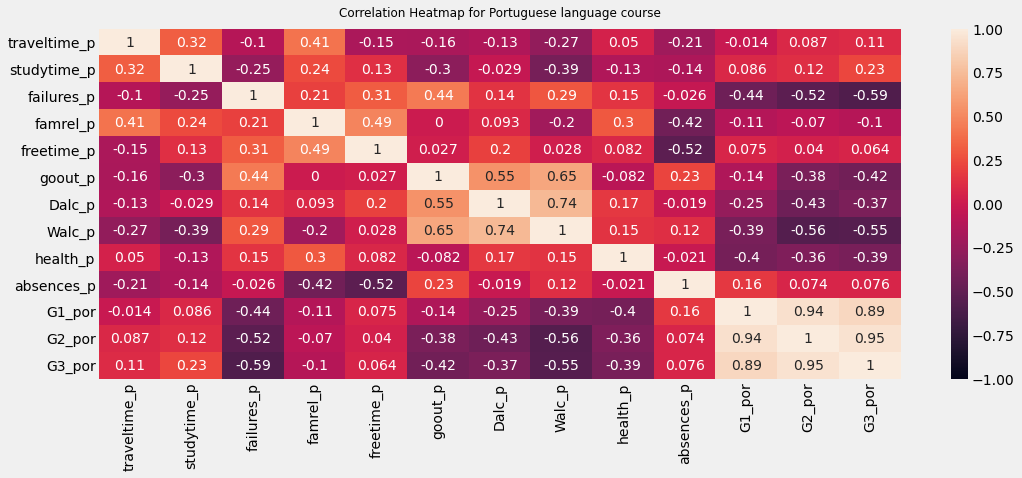

In [46]:
#checking correlation for value from Port data
corr=data.iloc[10:33,10:33].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Portuguese language course', fontdict={'fontsize':12}, pad=12);

These two boxplot shows the trend that students buy more alco on weekends than weekdays. If the family relations gets better, students buy less alcohols. However, if students' have a worst family relationship, there is no difference if they buy alco on weekdays or weenkend. It is similar for failure of past courses times, more alco on weekends means that more times of failures. 

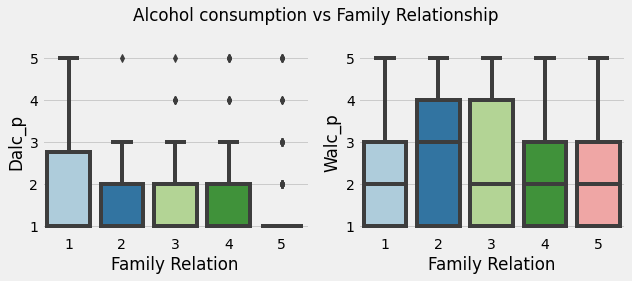

In [240]:
# Family relationship vs alco consumption
cols=['Dalc_p','Walc_p']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='famrel_p',y=col,data=data,palette="Paired").set(xlabel='Family Relation')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Family Relationship')

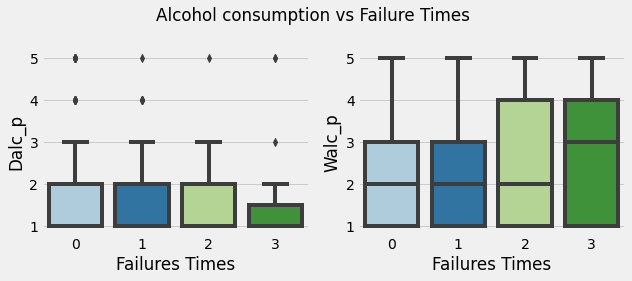

In [190]:
# Failure courses times vs alco consumption
cols=['Dalc_p','Walc_p']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='failures_p',y=col,data=data,palette="Paired").set(xlabel='Failures Times')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Failure Times ')

These two Line charts illustrate the Alcohol consumption Vs students' time distributions by age groups on workdays and weekends.  

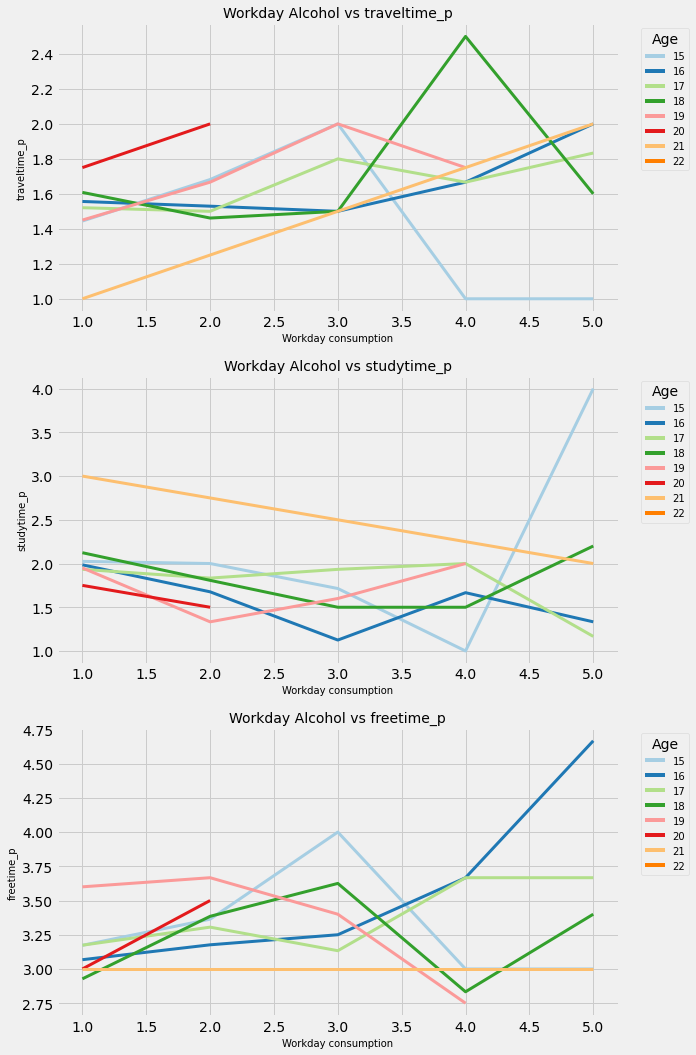

In [206]:
#Workday alco Vs Time Distrubuted
TimeDis=['traveltime_p', 'studytime_p','freetime_p']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    health=data.groupby(['Dalc_p','age'])[col].mean()
    health=health.reset_index('Dalc_p')
 
    ax = sns.lineplot(x='Dalc_p',y=col,hue=health.index,
                 data=health,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Age")
    

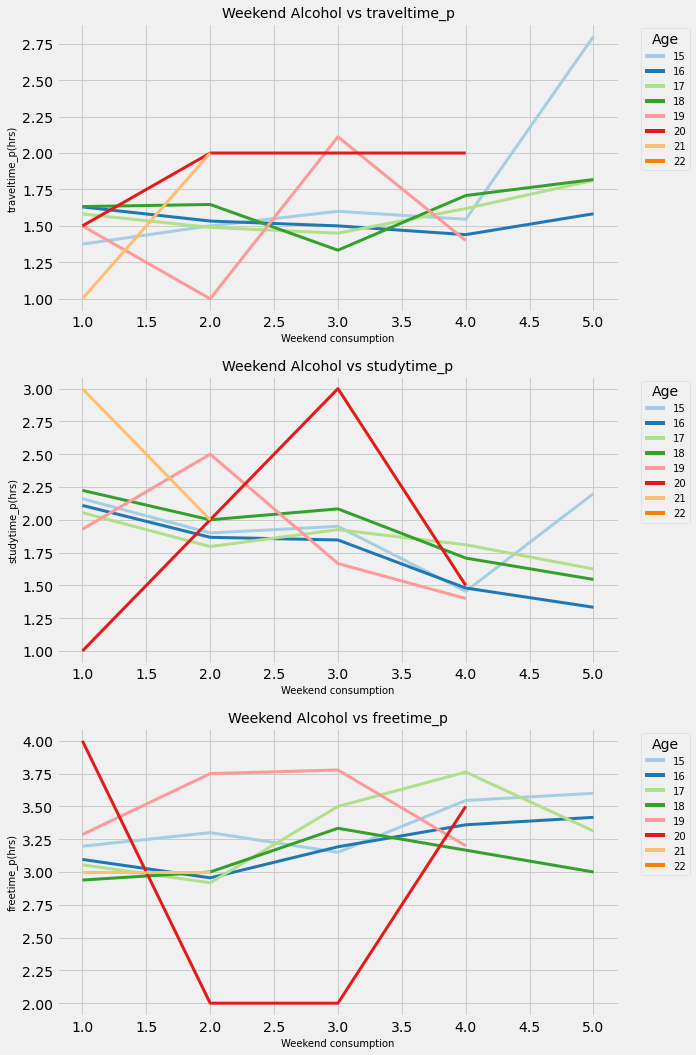

In [210]:
#Weekend Alco Vs Time Distubuted by Age
TimeDis=['traveltime_p', 'studytime_p','freetime_p']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    X=data.groupby(['Walc_p','age'])[col].mean()
    X=X.reset_index('Walc_p')
 
    ax = sns.lineplot(x='Walc_p',y=col,hue=X.index,
                 data=X,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}(hrs)',fontsize = 10)
    plt.legend(fontsize = 10, bbox_to_anchor= (1.03, 1),title="Age")
    

Comparing Alcohol consumption Vs 3 different phases grades based on the condition if the students have extra-curricular activities. It shows students who buy more alcohol have lower grade performance than who but less alcohol. Students who have activities have higher grade than students who do not have activities. As phases goes on, the gap of grades between activities and non-activities students getting bigger.

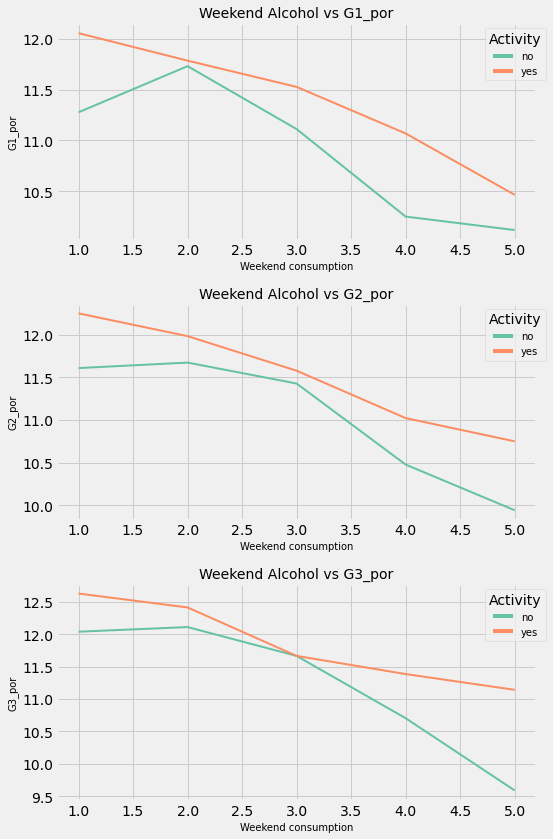

In [225]:
#weekend Alco Vs 2 phases grades by Activities
Grade=['G1_por','G2_por','G3_por']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc_p','activities_p'])[col].mean()
    x=x.reset_index('Walc_p')
    
    sns.lineplot(x='Walc_p',y=col,hue=x.index,data=x, palette="Set2",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

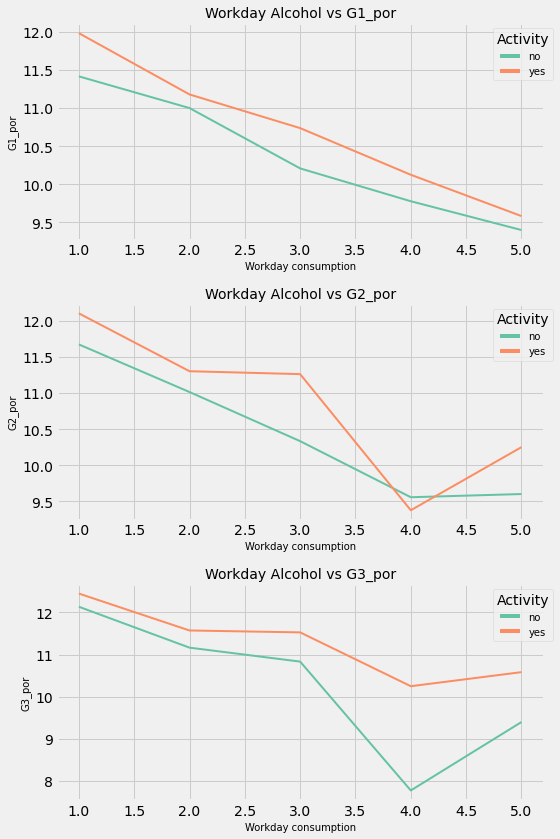

In [227]:
#Workday Alco Vs 3 phases grade by Avtivities
Grade=['G1_por','G2_por','G3_por']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc_p','activities_p'])[col].mean()
    x=x.reset_index('Dalc_p')
    
    sns.lineplot(x='Dalc_p',y=col,hue=x.index,data=x,palette="Set2",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

The line charts show that even the students have family support, if they but too many alcohols, their grade still getting worse. 

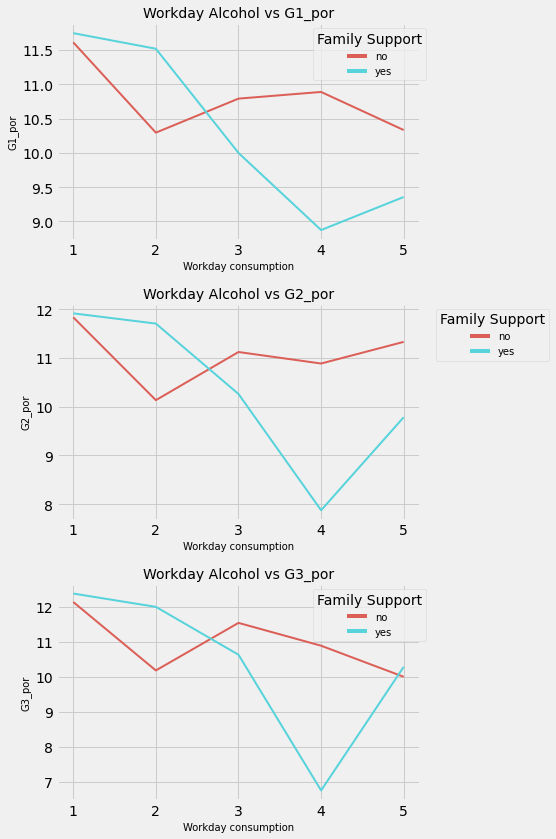

In [223]:
#Workday Alco Vs 3 phases by Family support
Grade=['G1_por','G2_por','G3_por']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc_p','famsup_p'])[col].mean()
    x=x.reset_index('Dalc_p')
    
    sns.lineplot(x='Dalc_p',y=col,hue=x.index,data=x, palette="hls",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize =10,bbox_to_anchor= (1.03, 1),title="Family Support")

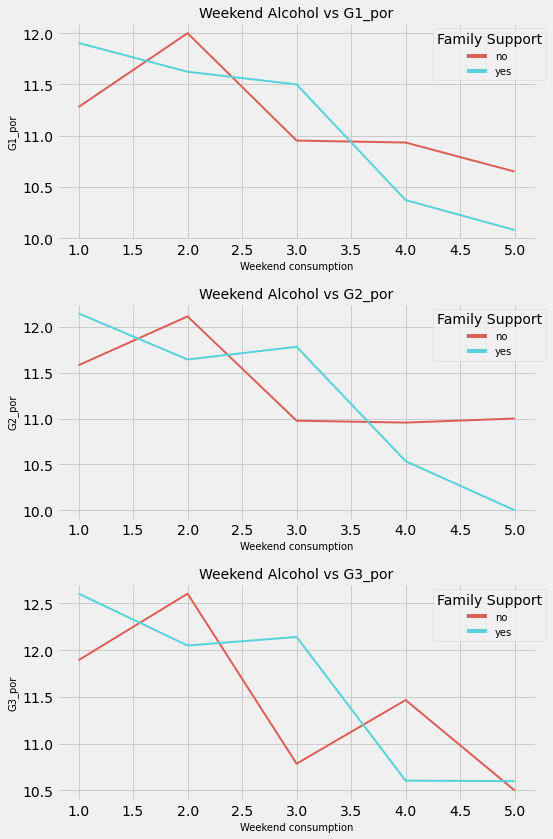

In [224]:
#Weekend Alco Vs 3 phases grades by Family support
Grade=['G1_por','G2_por','G3_por']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc_p','famsup_p'])[col].mean()
    x=x.reset_index('Walc_p')
    
    sns.lineplot(x='Walc_p',y=col,hue=x.index,data=x,palette="hls",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Family Support")

### Math data

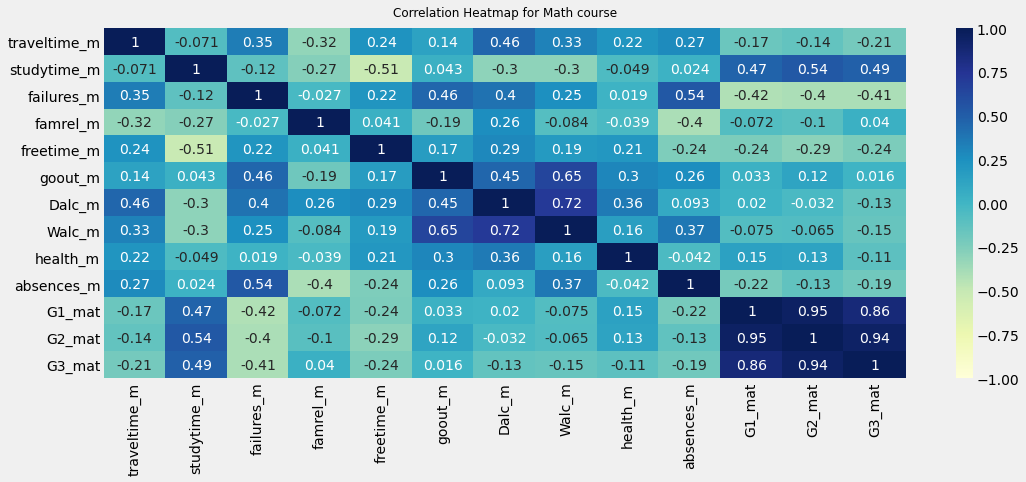

In [202]:
#checking correlation for value from Math data
corr=data.iloc[33:53,33:53].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap for Math course', fontdict={'fontsize':12}, pad=12);

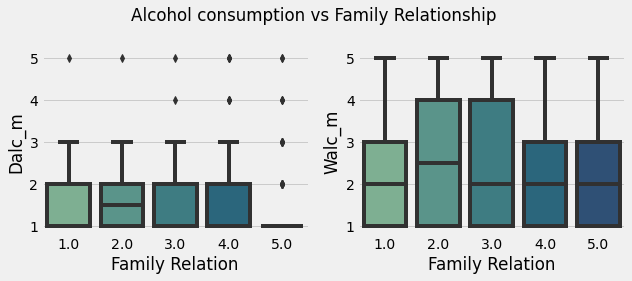

In [204]:
# Family relationship vs alco consumption
cols=['Dalc_m','Walc_m']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='famrel_m',y=col,data=data,palette="crest").set(xlabel='Family Relation')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Family Relationship ')

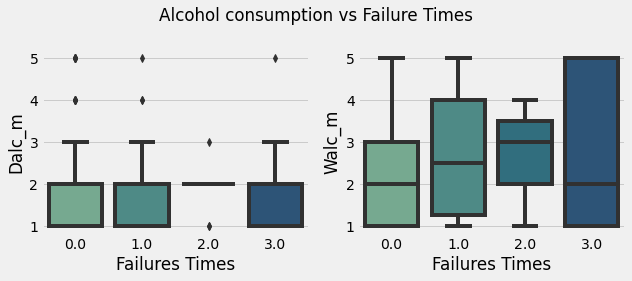

In [205]:
# Failure courses times vs alco consumption
cols=['Dalc_m','Walc_m']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='failures_m',y=col,data=data,palette="crest").set(xlabel='Failures Times')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Failure Times')

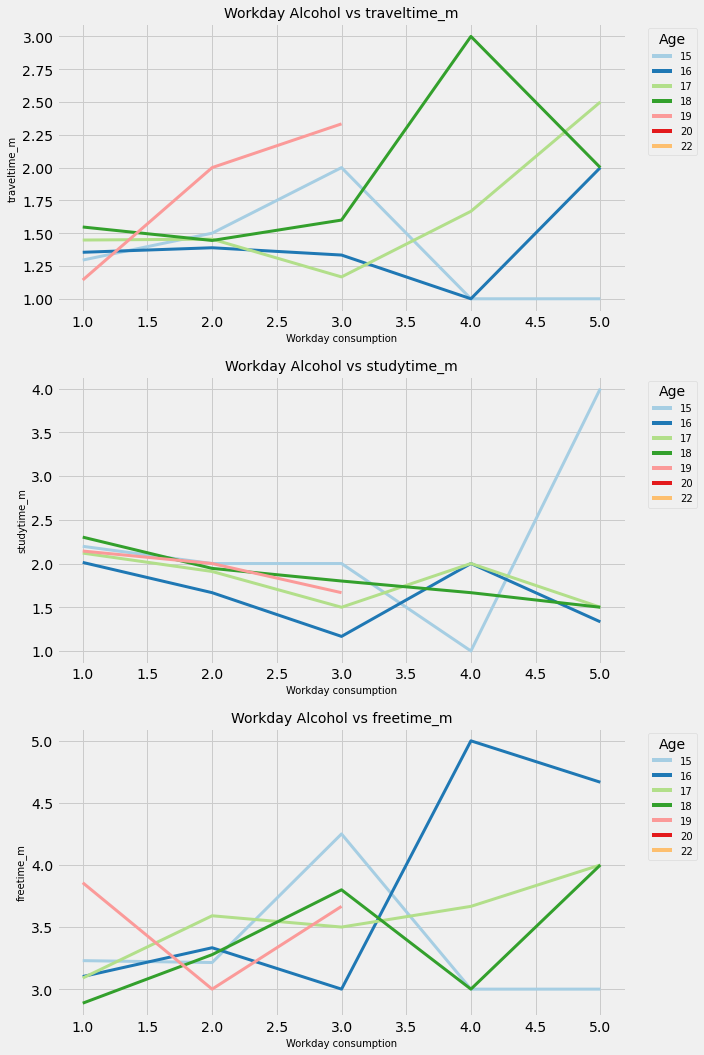

In [209]:
#Workday alco Vs Time Distrubuted
TimeDis=['traveltime_m', 'studytime_m','freetime_m']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    health=data.groupby(['Dalc_m','age'])[col].mean()
    health=health.reset_index('Dalc_m')
 
    ax = sns.lineplot(x='Dalc_m',y=col,hue=health.index,
                 data=health,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Age")

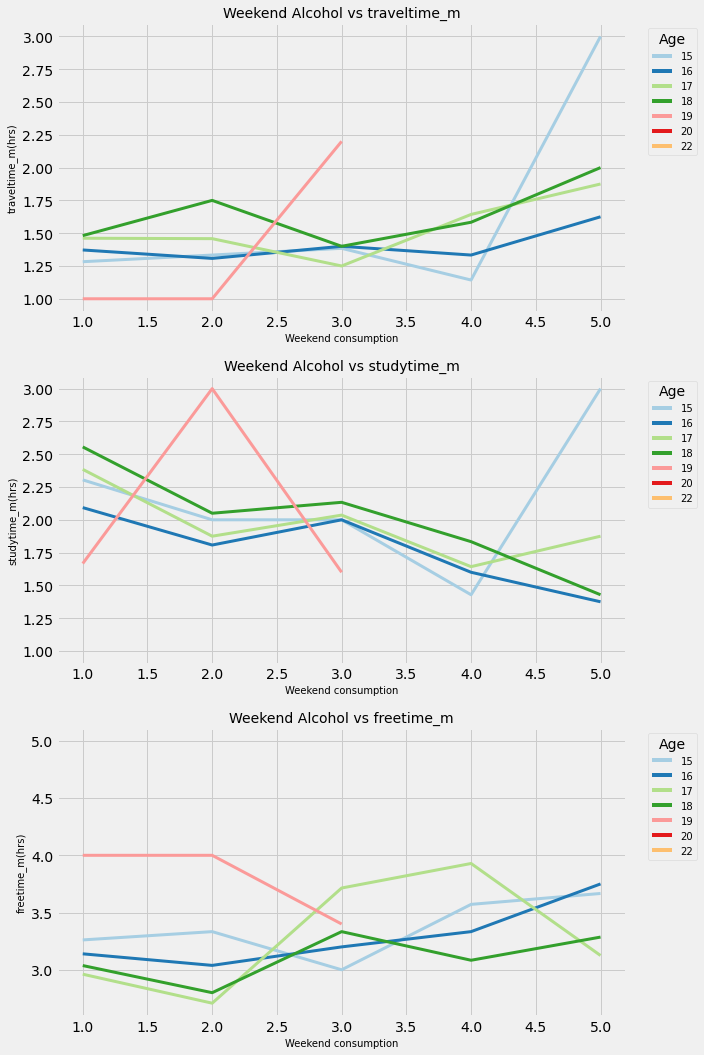

In [212]:
#Weekend Alco Vs Time Distubuted by Age
TimeDis=['traveltime_m', 'studytime_m','freetime_m']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    X=data.groupby(['Walc_m','age'])[col].mean()
    X=X.reset_index('Walc_m')
 
    ax = sns.lineplot(x='Walc_m',y=col,hue=X.index,
                 data=X,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}(hrs)',fontsize = 10)
    plt.legend(fontsize = 10, bbox_to_anchor= (1.03, 1),title="Age")

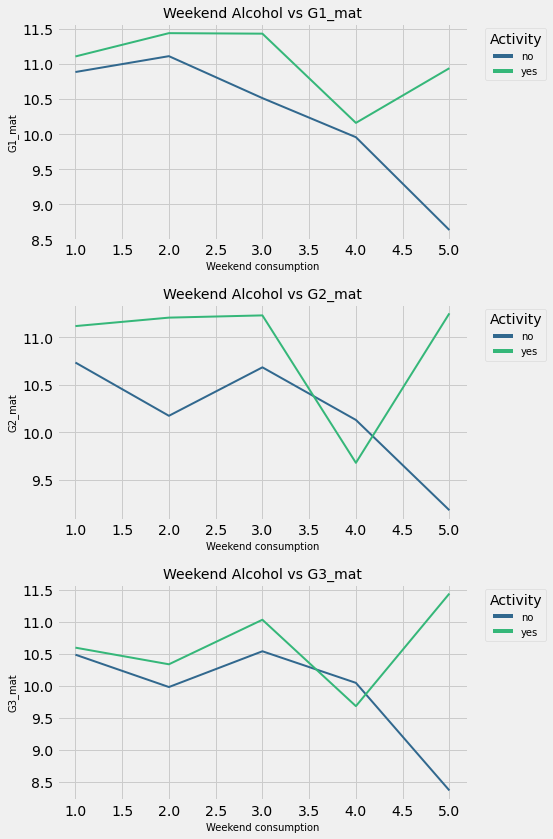

In [222]:
#weekend Alco Vs 2 phases grades
Grade=['G1_mat','G2_mat','G3_mat']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc_m','activities_m'])[col].mean()
    x=x.reset_index('Walc_m')
    
    sns.lineplot(x='Walc_m',y=col,hue=x.index,data=x, palette="viridis",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

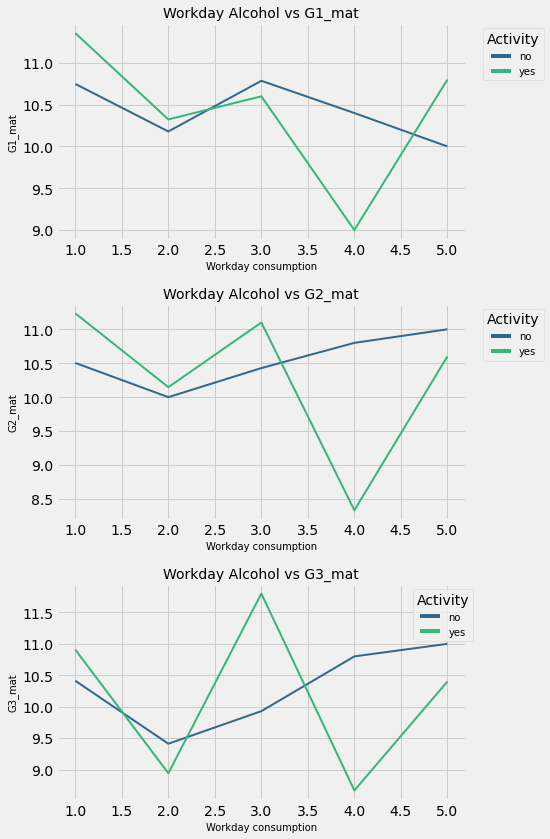

In [221]:
#Workday Alco Vs 3 phases grade
Grade=['G1_mat','G2_mat','G3_mat']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc_m','activities_m'])[col].mean()
    x=x.reset_index('Dalc_m')
    
    sns.lineplot(x='Dalc_m',y=col,hue=x.index,data=x,palette="viridis",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

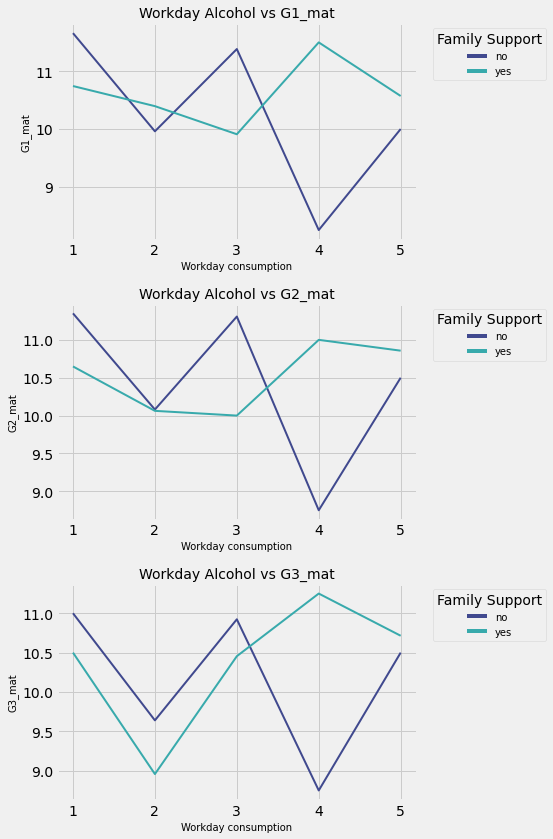

In [229]:
#Workday Alco Vs 3 phases by Family support
Grade=['G1_mat','G2_mat','G3_mat']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc_m','famsup_m'])[col].mean()
    x=x.reset_index('Dalc_m')
    
    sns.lineplot(x='Dalc_m',y=col,hue=x.index,data=x, palette="mako",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize =10,bbox_to_anchor= (1.03, 1),title="Family Support")

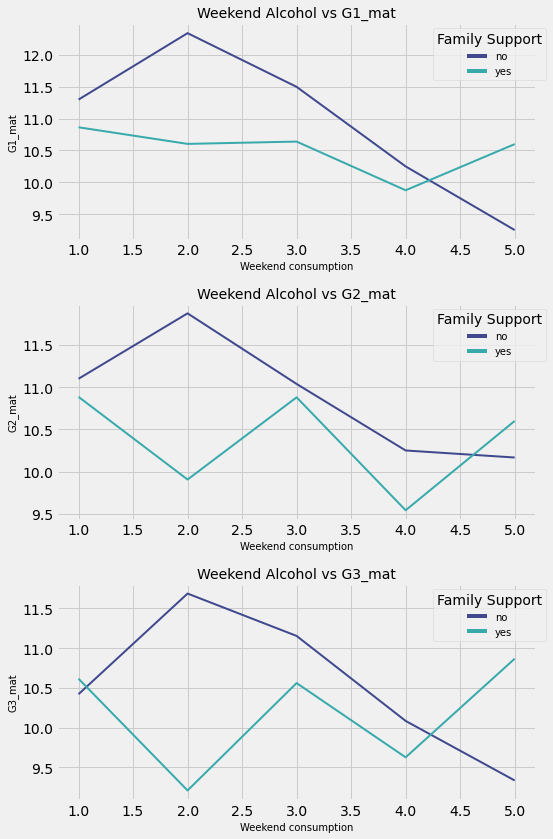

In [230]:
#Weekend Alco Vs 3 phases grades by Family support
Grade=['G1_mat','G2_mat','G3_mat']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc_m','famsup_m'])[col].mean()
    x=x.reset_index('Walc_m')
    
    sns.lineplot(x='Walc_m',y=col,hue=x.index,data=x,palette="mako",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Family Support")

## model/algorithm building

## data visualization